In [14]:
%%capture
%pip install -qU face-alignment torch_snippets

In [15]:
import face_alignment
from torch_snippets import read, show

In [16]:
!wget -q https://www.dropbox.com/s/lpw10qawsc5ipbn/MyImage.JPG -O MyImage.jpg

In [17]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')

In [18]:
import os
import cv2

image_path = "/content/MyImage.jpg"
if os.path.exists(image_path):
  input = cv2.imread(image_path)
  if input is not None:
    preds = fa.get_landmarks(input)[0]
    print(preds.shape)
  else:
    print(f"Error: Could not read image file at {image_path}")
else:
  print(f"Error: Image file not found at {image_path}")

Error: Could not read image file at /content/MyImage.jpg


Error: Could not read image file for visualization.


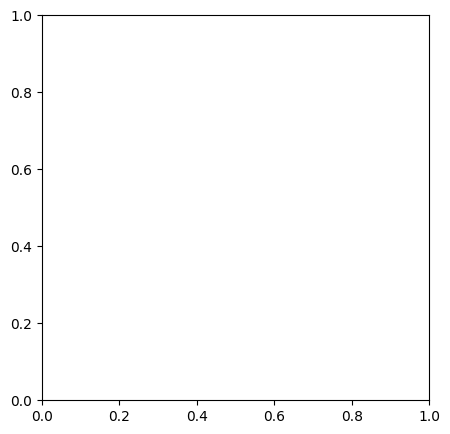

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,5))
image = cv2.imread('MyImage.jpg')
if image is not None:
  show(image, ax=ax)
  ax.scatter(preds[:,0], preds[:,1], marker='+', c='r')
  plt.show()
else:
  print("Error: Could not read image file for visualization.")

In [20]:
cv2.imread('MyImage.jpg')

In [22]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, flip_input=False, device='cpu')
input = cv2.imread('MyImage.jpg')
if input is not None:
  preds = fa.get_landmarks(input)[0]
  import pandas as pd
  df = pd.DataFrame(preds)
  df.columns = ['x','y','z']
  import plotly.express as px
  fig = px.scatter_3d(df, x = 'x', y = 'y', z = 'z')
  fig.show()
else:
  print("Error: Could not read image file.")

Error: Could not read image file.
